#Import the basic libraries to read the CSV file and visualize the data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#Đọc tập dữ liệu trong tệp CSV. Xác định tập dữ liệu cho mô hình

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_customers/Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
dataset.shape

(200, 5)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = dataset.iloc[:, [3, 4]].values

#Để triển khai phân cụm K-Means, chúng ta cần tìm số lượng cụm tối ưu mà khách hàng sẽ được đặt trong đó. Để tìm số cụm tối ưu cho K-Means, phương pháp Elbow được sử dụng dựa trên Tổng bình phương trong cụm (WCSS).

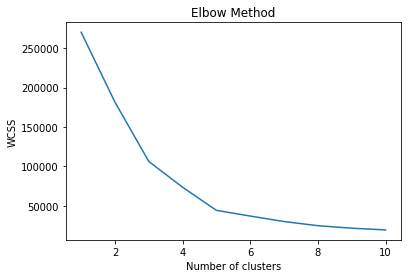

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Như chúng ta có thể thấy trong hình trên, biểu đồ trên được hình dung dưới dạng một bàn tay và chúng ta cần xác định vị trí của khuỷu tay trên trục X. Trong biểu đồ trên, khuỷu tay dường như nằm ở điểm 5 của trục X. Vì vậy, số cụm tối ưu sẽ là 5 cho thuật toán K-Means.

#Sau khi tìm được số lượng cụm tối ưu, hãy khớp mô hình phân cụm K-Means với tập dữ liệu được xác định ở bước thứ hai và sau đó dự đoán các cụm cho từng thành phần dữ liệu. Điều đó có nghĩa là nó sẽ dự đoán mục dữ liệu sẽ thuộc về cụm nào trong số 5 cụm.

In [7]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

 Khi thuật toán dự đoán một cụm cho từng mục dữ liệu, chúng ta cần trực quan hóa kết quả thông qua biểu đồ. Để thể hiện tốt hơn, chúng ta cần cung cấp cho mỗi cụm một màu và tên duy nhất.

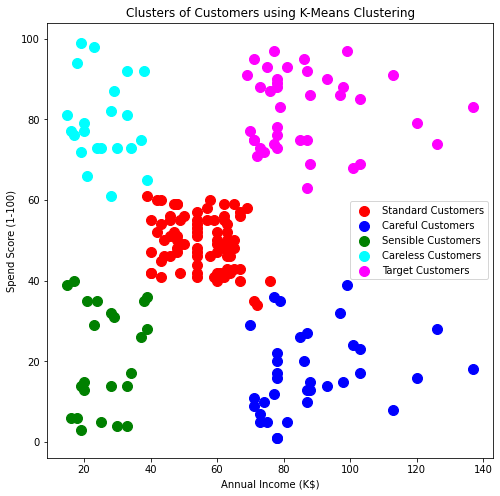

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

Tên của các cụm được đưa ra dựa trên thu nhập và chi tiêu của họ. Ví dụ, khi đề cập đến một khách hàng có thu nhập thấp và mức chi tiêu cao, chúng tôi đã sử dụng màu lục lam. Nhóm này biểu thị 'Khách hàng bất cẩn'( ‘Careless Customer’) vì mặc dù có thu nhập thấp nhưng họ chi tiêu nhiều hơn. Để bán một sản phẩm xa xỉ, nên nhắm đến những người có thu nhập cao và thói quen chi tiêu cao. Nhóm khách hàng này được thể hiện bằng màu đỏ tươi trong sơ đồ trên.

# Bây giờ, nhiệm vụ tương tự sẽ được thực hiện bằng cách sử dụng phân cụm theo cấp bậc. Việc đọc các tệp CSV và tạo tập dữ liệu cho các thuật toán sẽ phổ biến như được đưa ra trong bước đầu tiên và bước thứ hai. Trong K-Means, số lượng cụm tối ưu được tìm thấy bằng phương pháp khuỷu tay " the elbow method". Trong phân cụm theo cấp bậc (In hierarchical clustering), các dendrogram được sử dụng cho mục đích này. Các dòng mã dưới đây vẽ một dendrogram cho tập dữ liệu của chúng tôi.

Bây giờ, hãy nói thêm về việc thực hiện Phân cụm theo cấp bậc . Đầu tiên, chúng tôi sử dụng dendrogram để tìm số lượng cụm chính xác, giống hệt như chúng tôi đã làm trong K-Mean.

Biểu đồ dendrogram này được hình dung như sau:


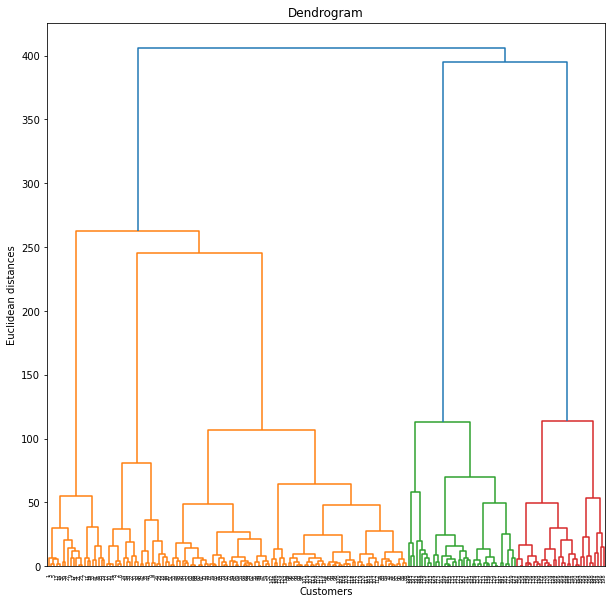

In [9]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
print("Biểu đồ dendrogram này được hình dung như sau:")
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Nếu bạn biết về phương pháp này, bạn có thể thấy trong các sơ đồ trên. Tổ hợp 5 dòng không nối trên trục Y từ 100 đến 240, cho khoảng 140 đơn vị. Vì vậy, số cụm tối ưu sẽ là 5 để phân cụm theo thứ bậc. 

#7. Bây giờ chúng ta huấn luyện thuật toán phân cụm theo thứ bậc "hierarchical clustering algorithm" và dự đoán cụm cho từng điểm dữ liệu.

Để tìm số lượng cụm tối ưu, chúng ta cần tìm khoảng cách dọc lớn nhất mà chúng ta có thể thực hiện mà không vượt qua bất kỳ đường ngang nào khác. Vì vậy, bây giờ chúng ta có thể điều chỉnh phân cụm theo cấp bậc của mình cho tập dữ liệu trung tâm mua sắm. Để làm điều đó ở đây chúng tôi sử dụng phương pháp Cắt cây" Cut Tree".

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Sau khi thuật toán dự đoán cụm cho từng điểm dữ liệu, nó có thể được hiển thị ngay bây giờ.

# Visualising the clusters

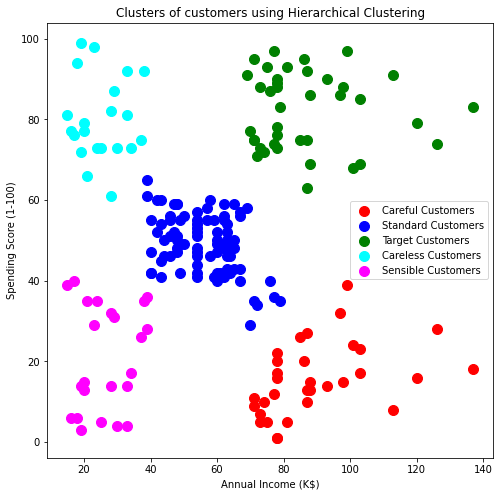

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful Customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard Customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible Customers')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

+)SENSIBLE : có thu nhập thấp và điểm chi tiêu thấp <br>
+)STANDART : có cả thu nhập và chi tiêu trung bình <br>
+)Target  : có thu nhập cao và chi tiêu cao. Họ là khách hàng mục tiêu nhất trong một công ty <br>
+)CAREFUL :  có thu nhập cao và chi tiêu thấp 

Chúng ta có thể thấy trong sơ đồ trên rằng việc phân cụm khách hàng gần giống với những gì đã được thực hiện bởi phân cụm K-Means. Chỉ có sự kết hợp màu sắc đã được thay đổi để phân biệt cả hai sơ đồ. 

So sánh giữa K-Means & Phân cụm theo cấp bậc <br><br>
Như chúng ta đã thấy trong phần trên, kết quả của cả hai cách phân cụm gần như tương tự với cùng một bộ dữ liệu. Có thể là khi chúng ta có một tập dữ liệu rất lớn, hình dạng của các cụm có thể khác một chút. Tuy nhiên, bên cạnh nhiều điểm tương đồng, hai kỹ thuật này cũng có một số điểm khác biệt. Bảng dưới đây cho thấy sự so sánh giữa K-Means và thuật toán phân cụm theo cấp bậc dựa trên các triển khai của chúng tôi.

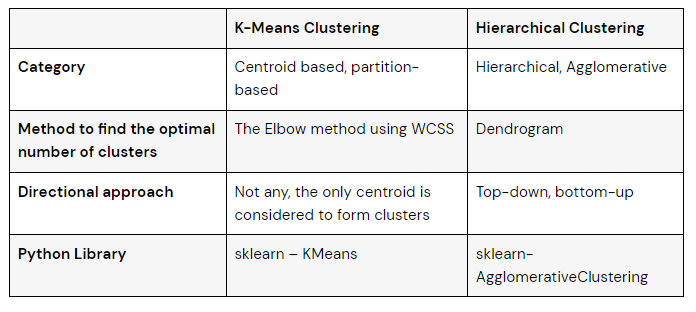

Tài liệu tham khảo :      


*   [analyticsindiamag](https://analyticsindiamag.com/comparison-of-k-means-hierarchical-clustering-in-customer-segmentation/)
*   [andreaperlato](https://www.andreaperlato.com/mlpost/customer-segmentation/)


*   [enjoyalgorithms](https://www.enjoyalgorithms.com/blog/customer-segmentation-using-hierarchical-clustering)

*   [Medium](https://medium.com/analytics-vidhya/customer-segmentation-using-cluster-analysis-ed1f3a7c5920)



